# Pascal's Triangle

[Wikipedia](https://en.wikipedia.org/wiki/Pascal%27s_triangle) | [Numberphile](https://www.youtube.com/watch?v=0iMtlus-afo)

Each cell is derived by adding the number above and to the left with the number above and to the right.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/PascalTriangleAnimated2.gif/220px-PascalTriangleAnimated2.gif)

We can construct this by calculating each row using the previous one:

In [1]:
def build(size):
    for i in range(size):
        row = []
        
        for j in range(i + 1):
            if j == 0 or j == i:
                row.append(1)
            else:
                row.append(prev[j - 1] + prev[j])
                
        yield row
        
        prev = row


for row in build(15):
    print(row)

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]
[1, 6, 15, 20, 15, 6, 1]
[1, 7, 21, 35, 35, 21, 7, 1]
[1, 8, 28, 56, 70, 56, 28, 8, 1]
[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]
[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]
[1, 11, 55, 165, 330, 462, 462, 330, 165, 55, 11, 1]
[1, 12, 66, 220, 495, 792, 924, 792, 495, 220, 66, 12, 1]
[1, 13, 78, 286, 715, 1287, 1716, 1716, 1287, 715, 286, 78, 13, 1]
[1, 14, 91, 364, 1001, 2002, 3003, 3432, 3003, 2002, 1001, 364, 91, 14, 1]


In this approach the previous row is retained to compute the next. Each cell of Pascal's Triangle can be calculated by the number of combinations of `y` things `x` ways.


For example, to calculate cell `(8, 10)`, we can use the formula for combinations: `y! / (x! * (y - x)!)`

In [2]:
from math import factorial

def combinations(y, x):
    return int(factorial(y) / (factorial(x) * factorial(y - x)))

combinations(10, 8)

45

The 8th item of the 10th row is 45. In Python 3.8, `math.comb` does this work for us.

In [3]:
from math import comb

comb(10, 8)

45

In [4]:
def build(size):
    for i in range(size):
        yield [comb(i, j) for j in range(i + 1)] 
            

for row in build(15):
    print(row)

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]
[1, 6, 15, 20, 15, 6, 1]
[1, 7, 21, 35, 35, 21, 7, 1]
[1, 8, 28, 56, 70, 56, 28, 8, 1]
[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]
[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]
[1, 11, 55, 165, 330, 462, 462, 330, 165, 55, 11, 1]
[1, 12, 66, 220, 495, 792, 924, 792, 495, 220, 66, 12, 1]
[1, 13, 78, 286, 715, 1287, 1716, 1716, 1287, 715, 286, 78, 13, 1]
[1, 14, 91, 364, 1001, 2002, 3003, 3432, 3003, 2002, 1001, 364, 91, 14, 1]


That returns the same result. It still requires two loops, but no additional storage.

A row or diagonal can be computed independently. A single row can be computed using [this formula](https://en.wikipedia.org/wiki/Pascal%27s_triangle#Calculating_a_row_or_diagonal_by_itself):

In [5]:
def row(n):
    line = [1]
    
    for k in range(n):
        line.append(line[k] * (n - k) // (k + 1))

    return line


row(3)

[1, 3, 3, 1]

Let's make this look... triangle-y:

In [6]:
for row in build(15):
    display = ''.join([str(i).rjust(6) for i in row])
    print(display.center(100))

                                                    1                                               
                                                 1     1                                            
                                              1     2     1                                         
                                           1     3     3     1                                      
                                        1     4     6     4     1                                   
                                     1     5    10    10     5     1                                
                                  1     6    15    20    15     6     1                             
                               1     7    21    35    35    21     7     1                          
                            1     8    28    56    70    56    28     8     1                       
                         1     9    36    84   126   126    84    36     9     1           

There's are several patterns embedded within the triangle. For example, if you sum each row, you get the powers of 2.

In [7]:
matrix = list(build(20))

for row in matrix:
    print(sum(row), end=' ')

1 2 4 8 16 32 64 128 256 512 1024 2048 4096 8192 16384 32768 65536 131072 262144 524288 

Each diagnonal band sums to the Fibonnaci sequence:

In [8]:
for i in range(len(matrix)):
    row = i
    col = 0
    total = 0
    
    while row >= col:
        total += matrix[row][col]
        row -= 1
        col += 1
    
    print(total, end=' ')

1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 

The second column returns counting numbers:

In [9]:
for i in range(1, len(matrix)):
    print(matrix[i][1], end=' ')

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

And the third triangular numbers:

In [10]:
for i in range(2, len(matrix)):
    print(matrix[i][2], end=' ')

1 3 6 10 15 21 28 36 45 55 66 78 91 105 120 136 153 171 

The second and third columns contain perfect squares of natural numbers. For each number in the second column, the number immediately to its right and the number below that sum to its square.

In [11]:
for i in range(2, len(matrix) - 1):
    print(f'{matrix[i][1]:>2} {matrix[i][1]**2:>3} = {matrix[i][2]} + {matrix[i+1][2]}')

 2   4 = 1 + 3
 3   9 = 3 + 6
 4  16 = 6 + 10
 5  25 = 10 + 15
 6  36 = 15 + 21
 7  49 = 21 + 28
 8  64 = 28 + 36
 9  81 = 36 + 45
10 100 = 45 + 55
11 121 = 55 + 66
12 144 = 66 + 78
13 169 = 78 + 91
14 196 = 91 + 105
15 225 = 105 + 120
16 256 = 120 + 136
17 289 = 136 + 153
18 324 = 153 + 171


This array has everything! If you color in only the odd cells, a familiar pattern emerges: the Sierpiński triangle.

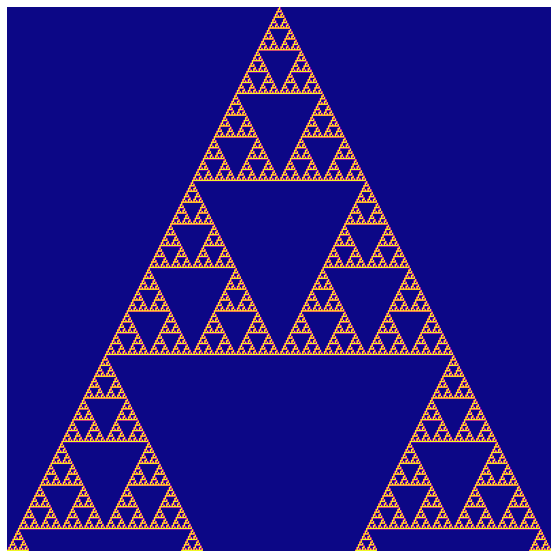

In [12]:
import matplotlib.pyplot as plt

    
def draw(size):
    _, ax = plt.subplots(figsize=(10, 10))
    matrix = [[0 for _ in range(size)] for _ in range(size)]

    for i in range(size):
        for j in range(i + 1):
            x = (size - i) // 2 + j
            matrix[i][x] = comb(i, j) % 2
            
    ax.imshow(matrix, cmap='plasma')
    ax.axis(False);
    

draw(400)